In [24]:
import pandas as pd
import numpy as np
from pulp import *
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
tareas_df = pd.read_csv('tareas_v1.csv')
desarrolladores_df = pd.read_csv('desarrolladores_v1.csv')



### 1. Planteamiento del Programa Lineal

### Variables de Decisión
x[i,j] = Horas asignadas del desarrollador i a la tarea j

### Función Objetivo
MIN Σ(i,j) (c[i] * x[i,j])
donde:
- c[i]: Costo por hora del desarrollador i

### Restricciones

1. Completitud de tareas:
   Para cada tarea j:
   Σ(i) (e[i,j] * x[i,j]) = h[j]
   donde:
   - e[i,j] = min(1, exp[i]/req[j]): Eficiencia del desarrollador i en la tarea j
   - exp[i]: Años de experiencia del desarrollador i
   - req[j]: Años de experiencia requeridos para la tarea j
   - h[j]: Horas necesarias para completar la tarea j

2. Disponibilidad de desarrolladores:
   Para cada desarrollador i:
   Σ(j) x[i,j] ≤ d[i]
   donde:
   - d[i]: Máximo de horas disponibles del desarrollador i

3. No negatividad:
   x[i,j] ≥ 0 para todo i,j



### 2. Implementación


Status: Optimal
Costo total del proyecto: $40420.00


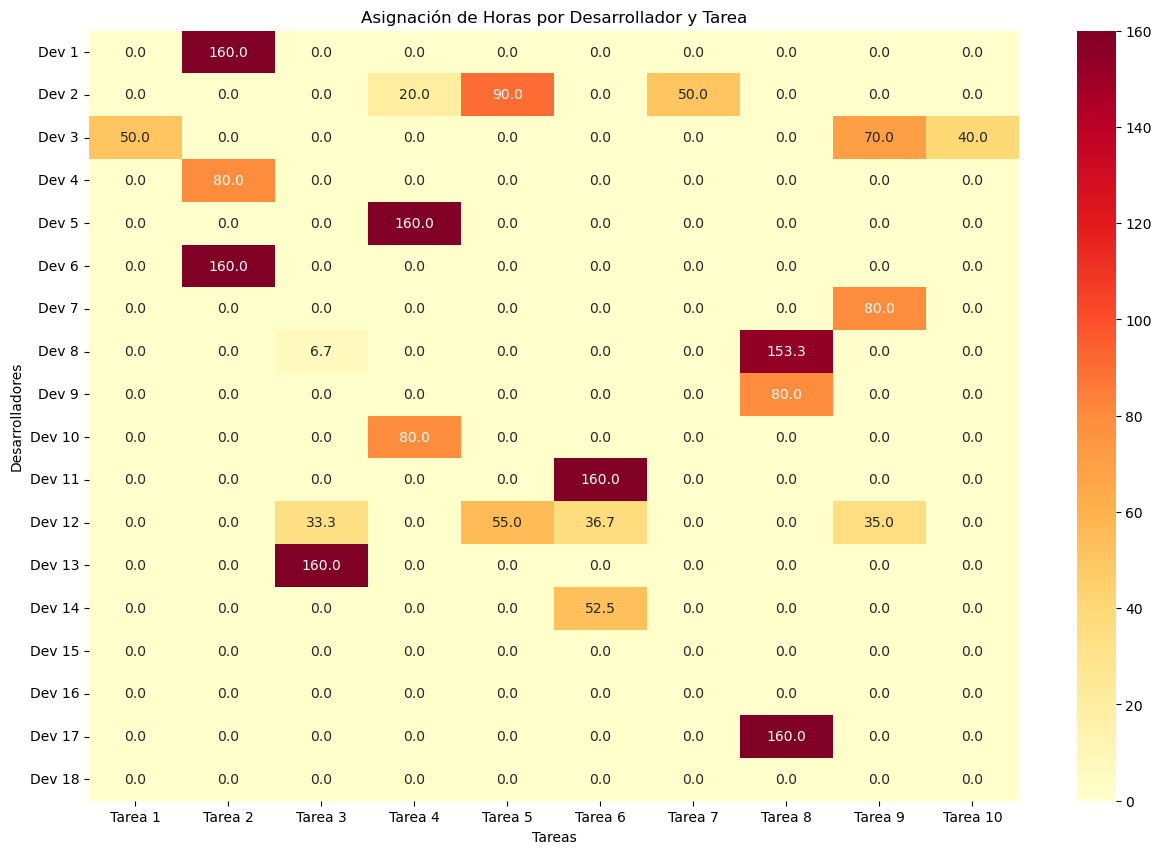

In [28]:
# Crear el modelo
model = LpProblem("Asignacion_Tareas", LpMinimize)

# Crear índices
desarrolladores = desarrolladores_df.index.tolist()
tareas = tareas_df.index.tolist()

# Variables de decisión
x = LpVariable.dicts("horas", 
                     ((i, j) for i in desarrolladores for j in tareas), 
                     lowBound=0)

# Función objetivo
model += lpSum(desarrolladores_df.loc[i, 'costo hora'] * x[i,j] 
               for i in desarrolladores for j in tareas)

# Calcular eficiencias
def calcular_eficiencia(exp_dev, exp_req):
    return min(1, exp_dev/exp_req)

# Restricción 1: Completitud de tareas
for j in tareas:
    model += lpSum(calcular_eficiencia(desarrolladores_df.loc[i, 'años de experiencia'],
                                     tareas_df.loc[j, 'años de experiencia requeridos']) * x[i,j] 
                  for i in desarrolladores) == tareas_df.loc[j, 'horas a trabajar en la tarea']

# Restricción 2: Disponibilidad de desarrolladores
for i in desarrolladores:
    model += lpSum(x[i,j] for j in tareas) <= desarrolladores_df.loc[i, 'maximo de horas disponibles']

# Resolver
solver = PULP_CBC_CMD(msg=False)
model.solve(solver)

# Obtener resultados
print(f"Status: {LpStatus[model.status]}")
print(f"Costo total del proyecto: ${value(model.objective):.2f}")

# Crear matriz de asignación
asignacion = pd.DataFrame(
    [[value(x[i,j]) for j in tareas] for i in desarrolladores],
    index=[f"Dev {i+1}" for i in desarrolladores],
    columns=[f"Tarea {j+1}" for j in tareas]
)

# Crear el heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(asignacion, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Asignación de Horas por Desarrollador y Tarea')
plt.xlabel('Tareas')
plt.ylabel('Desarrolladores')
plt.show()



In [10]:
# Mostrar estadísticas detalladas
print("\nEstadísticas por desarrollador:")
for i in desarrolladores:
    horas_asignadas = sum(value(x[i,j]) for j in tareas)
    costo_total = horas_asignadas * desarrolladores_df.loc[i, 'costo hora']
    print(f"Desarrollador {i+1}:")
    print(f"- Horas asignadas: {horas_asignadas:.1f}")
    print(f"- Costo total: ${costo_total:.2f}")


Estadísticas por desarrollador:
Desarrollador 1:
- Horas asignadas: 160.0
- Costo total: $1600.00
Desarrollador 2:
- Horas asignadas: 160.0
- Costo total: $1440.00
Desarrollador 3:
- Horas asignadas: 160.0
- Costo total: $1760.00
Desarrollador 4:
- Horas asignadas: 80.0
- Costo total: $1040.00
Desarrollador 5:
- Horas asignadas: 160.0
- Costo total: $2240.00
Desarrollador 6:
- Horas asignadas: 160.0
- Costo total: $2400.00
Desarrollador 7:
- Horas asignadas: 80.0
- Costo total: $1200.00
Desarrollador 8:
- Horas asignadas: 160.0
- Costo total: $4480.00
Desarrollador 9:
- Horas asignadas: 80.0
- Costo total: $1760.00
Desarrollador 10:
- Horas asignadas: 80.0
- Costo total: $2000.00
Desarrollador 11:
- Horas asignadas: 160.0
- Costo total: $3680.00
Desarrollador 12:
- Horas asignadas: 160.0
- Costo total: $3680.00
Desarrollador 13:
- Horas asignadas: 160.0
- Costo total: $4000.00
Desarrollador 14:
- Horas asignadas: 52.5
- Costo total: $2100.00
Desarrollador 15:
- Horas asignadas: 0.0
- 


2. DISTRIBUCIÓN ÓPTIMA DE HORAS

Asignaciones de horas significativas:
Desarrollador 1 -> Tarea 2: 160.0 horas
  Experiencia: 1.0 años
  Eficiencia: 0.50
Desarrollador 2 -> Tarea 4: 20.0 horas
  Experiencia: 1.0 años
  Eficiencia: 0.50
Desarrollador 2 -> Tarea 5: 90.0 horas
  Experiencia: 1.0 años
  Eficiencia: 0.50
Desarrollador 2 -> Tarea 7: 50.0 horas
  Experiencia: 1.0 años
  Eficiencia: 1.00
Desarrollador 3 -> Tarea 1: 50.0 horas
  Experiencia: 1.0 años
  Eficiencia: 1.00
Desarrollador 3 -> Tarea 9: 70.0 horas
  Experiencia: 1.0 años
  Eficiencia: 0.50
Desarrollador 3 -> Tarea 10: 40.0 horas
  Experiencia: 1.0 años
  Eficiencia: 1.00
Desarrollador 4 -> Tarea 2: 80.0 horas
  Experiencia: 1.5 años
  Eficiencia: 0.75
Desarrollador 5 -> Tarea 4: 160.0 horas
  Experiencia: 2.0 años
  Eficiencia: 1.00
Desarrollador 6 -> Tarea 2: 160.0 horas
  Experiencia: 2.2 años
  Eficiencia: 1.00
Desarrollador 7 -> Tarea 9: 80.0 horas
  Experiencia: 2.3 años
  Eficiencia: 1.00
Desarrollador 8 -> Tar

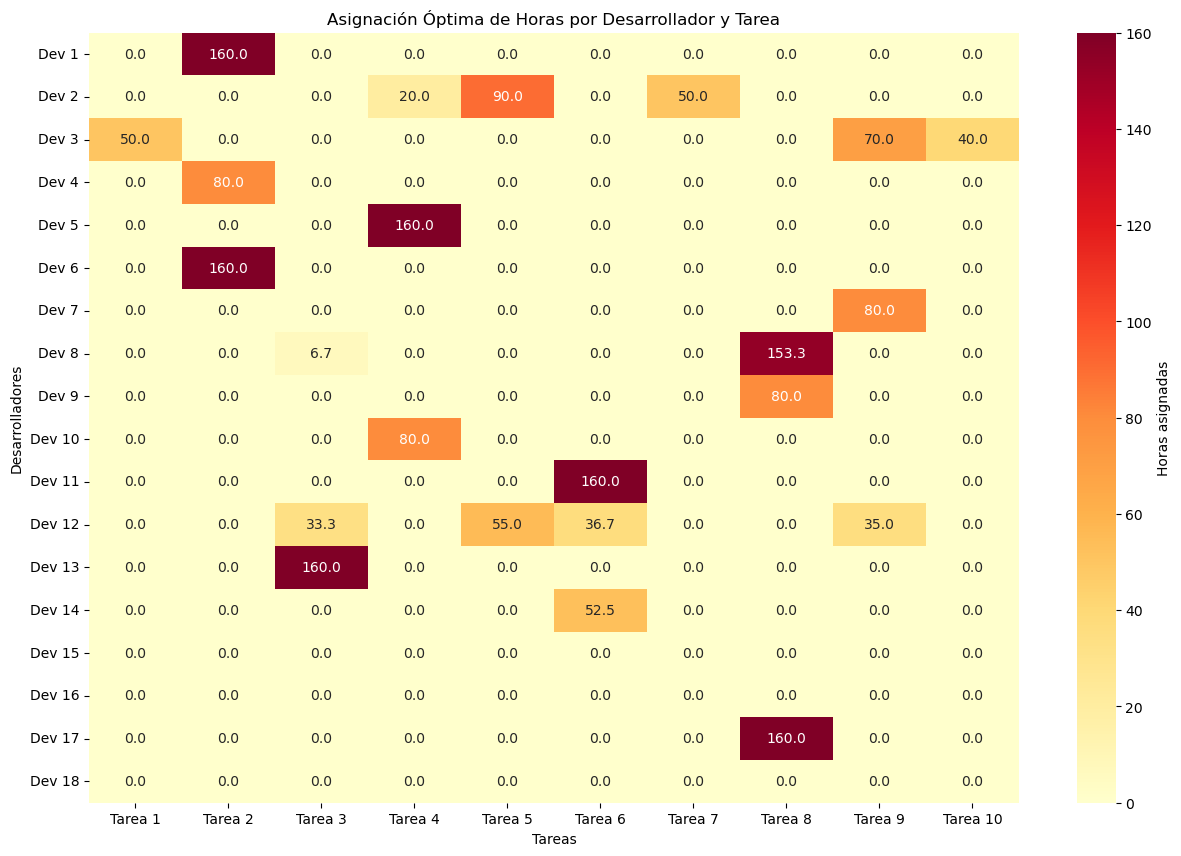


ESTADÍSTICAS ADICIONALES

Utilización de desarrolladores:
Desarrollador 1: 100.0% (160.0/160 horas)
Desarrollador 2: 100.0% (160.0/160 horas)
Desarrollador 3: 100.0% (160.0/160 horas)
Desarrollador 4: 100.0% (80.0/80 horas)
Desarrollador 5: 100.0% (160.0/160 horas)
Desarrollador 6: 100.0% (160.0/160 horas)
Desarrollador 7: 100.0% (80.0/80 horas)
Desarrollador 8: 100.0% (160.0/160 horas)
Desarrollador 9: 100.0% (80.0/80 horas)
Desarrollador 10: 100.0% (80.0/80 horas)
Desarrollador 11: 100.0% (160.0/160 horas)
Desarrollador 12: 100.0% (160.0/160 horas)
Desarrollador 13: 100.0% (160.0/160 horas)
Desarrollador 14: 32.8% (52.5/160 horas)
Desarrollador 15: 0.0% (0.0/160 horas)
Desarrollador 16: 0.0% (0.0/160 horas)
Desarrollador 17: 100.0% (160.0/160 horas)
Desarrollador 18: 0.0% (0.0/160 horas)

Compleción de tareas:
Tarea 1: 50.0/50 horas efectivas
Tarea 2: 300.0/300 horas efectivas
Tarea 3: 200.0/200 horas efectivas
Tarea 4: 250.0/250 horas efectivas
Tarea 5: 100.0/100 horas efectivas
Ta

In [26]:
# 2. Distribución óptima de horas
print("\n2. DISTRIBUCIÓN ÓPTIMA DE HORAS")
print("================================")

# Crear matriz de asignación
asignacion = pd.DataFrame(
    [[value(x[i,j]) for j in tareas] for i in desarrolladores],
    index=[f"Dev {i+1}" for i in desarrolladores],
    columns=[f"Tarea {j+1}" for j in tareas]
)

# Mostrar solo asignaciones significativas (>0)
print("\nAsignaciones de horas significativas:")
for i in desarrolladores:
    for j in tareas:
        if value(x[i,j]) > 0.1:
            print(f"Desarrollador {i+1} -> Tarea {j+1}: {value(x[i,j]):.1f} horas")
            print(f"  Experiencia: {desarrolladores_df.loc[i, 'años de experiencia']} años")
            print(f"  Eficiencia: {calcular_eficiencia(desarrolladores_df.loc[i, 'años de experiencia'], tareas_df.loc[j, 'años de experiencia requeridos']):.2f}")

# 3. Costo total del proyecto
print("\n3. COSTO TOTAL DEL PROYECTO")
print("===========================")
costo_total = value(model.objective)
print(f"Costo total: ${costo_total:.2f}")

# Desglose por desarrollador
print("\nDesglose por desarrollador:")
for i in desarrolladores:
    horas_asignadas = sum(value(x[i,j]) for j in tareas)
    costo_dev = horas_asignadas * desarrolladores_df.loc[i, 'costo hora']
    if horas_asignadas > 0:
        print(f"Desarrollador {i+1}:")
        print(f"  Horas totales: {horas_asignadas:.1f}")
        print(f"  Costo: ${costo_dev:.2f}")

# 4. Mapa de calor de la asignación óptima
print("\n4. MAPA DE CALOR DE LA ASIGNACIÓN")
print("================================")

plt.figure(figsize=(15, 10))
sns.heatmap(asignacion, 
            annot=True, 
            fmt='.1f', 
            cmap='YlOrRd',
            cbar_kws={'label': 'Horas asignadas'})
plt.title('Asignación Óptima de Horas por Desarrollador y Tarea')
plt.xlabel('Tareas')
plt.ylabel('Desarrolladores')
plt.show()

# Estadísticas adicionales
print("\nESTADÍSTICAS ADICIONALES")
print("=======================")
print("\nUtilización de desarrolladores:")
for i in desarrolladores:
    horas_asignadas = sum(value(x[i,j]) for j in tareas)
    horas_disponibles = desarrolladores_df.loc[i, 'maximo de horas disponibles']
    if horas_disponibles > 0:
        utilizacion = (horas_asignadas / horas_disponibles) * 100
        print(f"Desarrollador {i+1}: {utilizacion:.1f}% ({horas_asignadas:.1f}/{horas_disponibles} horas)")

print("\nCompleción de tareas:")
for j in tareas:
    horas_efectivas = sum(calcular_eficiencia(desarrolladores_df.loc[i, 'años de experiencia'],
                                            tareas_df.loc[j, 'años de experiencia requeridos']) * value(x[i,j])
                         for i in desarrolladores)
    print(f"Tarea {j+1}: {horas_efectivas:.1f}/{tareas_df.loc[j, 'horas a trabajar en la tarea']} horas efectivas")